In [1]:
import scipy.integrate as integrate
from numpy import sqrt, sin, cos, pi,arccos,arctan
import math

import requests
from bs4 import BeautifulSoup
import itertools
from matplotlib.patches import RegularPolygon
from IPython.display import Markdown, display,Image,HTML

April 2025 : Puzzle Show Solution For a fixed p , independently label the nodes of an infinite complete binary tree 0 with
probability p , and 1 otherwise. For what p is there exactly a 1/2 probability that
there exists an infinite path down the tree that sums to at most 1 (that is, all nodes
visited, with the possible exception of one, will be labeled 0). Find this value of p accurate to 10 decimal places .

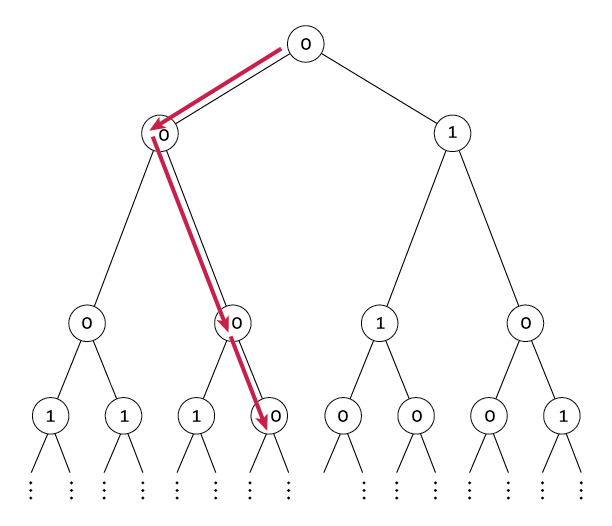

In [2]:
url='https://www.janestreet.com/puzzles/sum-one-somewhere-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[14:29])))
display(Image('https://www.janestreet.com/puzzles/sum-one-somewhere.png',width=200))

In [3]:
import functools
from scipy.optimize import brentq

@functools.lru_cache(maxsize=None)
def compute_prob(p, max_depth=500):

    def f(k, ones_left):
        if k == max_depth:
            return 1.0  # we've made it down to max_depth successfully
        prob = 0.0
        # Case 1: this node is 0
        prob_0 = p * (1 - (1 - f(k+1, ones_left))**2)
        prob += prob_0
        # Case 2: this node is 1, only if we have ones_left > 0
        if ones_left > 0:
            prob_1 = (1 - p) * (1 - (1 - f(k+1, ones_left - 1))**2)
            prob += prob_1
        return prob

    return f(0, 1)  # start at depth 0, with 1 allowed '1' node on the path

# Define the function to find root of
def target(p):
    return compute_prob(p) - 0.5

# Use brentq to find p in a reasonable range
p_solution = brentq(target, 0.53, 0.54)
print(f"Solution p = {p_solution:.10f}")


Solution p = 0.5306035754


In [14]:
url='https://www.janestreet.com/puzzles/sum-one-somewhere-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[16:81])))

For a fixed p , let f( p ) be the probability that the tree has an
infinite path of sum zero, and g( p ) the probability that the tree has
an infinite path of sum at most 1. This month’s problem is asking to
find the p such that g( p ) = 1/2. Using the decomposition of a binary tree into its root and its two subtrees, we see f( p ) = p ·(2f( p ) - f( p ) 2 ) which simplifies to f( p ) = 2 - 1/ p . Further, we see g( p ) = p ·(2g( p ) - g( p ) 2 ) + (1- p )·(2f( p ) - f( p ) 2 ). Plugging in g( p ) = 1/2 we end up with a cubic equation in p : 3 p 3 - 10 p 2 + 12 p - 4 = 0 with approximate solution 0.5306035754…